In [148]:
# References:
# Matplotlib Patches:- https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
# Networkx Read Adjacency List Input:- https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.adjlist.read_adjlist.html#networkx.readwrite.adjlist.read_adjlist
# Matplotlib Line plot:- https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
# Priority Queue Implementation:- https://docs.python.org/3/library/queue.html
# Dijkstra Algorithm PseudoCode:- https://www.programiz.com/dsa/dijkstra-algorithm
# Concepts discussed with Suchita Marru.

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from queue import PriorityQueue
import networkx as nx

In [86]:
# 22 points
nodes = {0:(50,1040),1:(200,800),2:(350,800),3:(200,1050),4:(350,1050),5:(650,800),6:(730,800),7:(650,1000),8:(730,1000),9:(400,400),10:(520,400),11:(400,580),12:(520,580),13:(100,100),14:(180,320),15:(340,304),16:(600,100),17:(650,230),18:(720,350),19:(880,320),20:(900,130),21:(950,250)}
# edges - connections between nodes.
adjacency_list = './adjacency_list.json'

lines = ['0 1 3 9 13 14 15',
         '1 0 9 11 12 13 14 15',
         '2 5 7 9 11 12 14 15',
         '3 0',
         '4 5 6  7 11 12 18',
         '5 2 4 10 11 12 16 17 18 19',
         '6 10 12 17 18 19 21',
         '7 2 4 10 11 12',
         '8 19 21',
         '9 0 1 2 14 15 16 17',
         '10 5 6 7 16 17 18',
         '11 1 2 4 5 6 7',
         '12 1 7 16 17 18',
         '13 0 1 2',
         '14 0 1 2 9 10 11 17 18',
         '15 0 1 2 9',
         '16 5 6 9 10 12 13 15',
         '17 4 5 6 9 10 12 13 15',
         '18 4 5 6 10 12 13 15',
         '19 5 6 8 12 21',
         '20 21',
         '21 6 8 19 20']

visibility_graph = nx.parse_adjlist(lines, nodetype = int)
print(visibility_graph.nodes)
print(visibility_graph.edges)

[0, 1, 3, 9, 13, 14, 15, 11, 12, 2, 5, 7, 4, 6, 18, 10, 16, 17, 19, 21, 8, 20]
[(0, 1), (0, 3), (0, 9), (0, 13), (0, 14), (0, 15), (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (9, 2), (9, 14), (9, 15), (9, 16), (9, 17), (13, 2), (13, 16), (13, 17), (13, 18), (14, 2), (14, 10), (14, 11), (14, 17), (14, 18), (15, 2), (15, 16), (15, 17), (15, 18), (11, 2), (11, 4), (11, 5), (11, 7), (11, 6), (12, 2), (12, 4), (12, 5), (12, 6), (12, 7), (12, 16), (12, 17), (12, 18), (12, 19), (2, 5), (2, 7), (5, 4), (5, 10), (5, 16), (5, 17), (5, 18), (5, 19), (7, 4), (7, 10), (4, 6), (4, 18), (4, 17), (6, 10), (6, 17), (6, 18), (6, 19), (6, 21), (6, 16), (18, 10), (10, 16), (10, 17), (19, 8), (19, 21), (21, 8), (21, 20)]


In [102]:
def euclidean_distance(point1,point2):
    return np.sqrt(sum((e1-e2)**2 for e1, e2 in zip(point1,point2)))

In [114]:
def dijkstra_algorithm(G,start_node):
    distance = [float('inf')]*len(G.nodes)
    parent = [None]*len(G.nodes)
    parent[0] = 0
    distance[0] = 0
    dist_list = [*zip(distance,range(len(G.nodes)))]
    fringe = PriorityQueue()
    while len(dist_list)>0:
        fringe.put(dist_list.pop(0))
    while not fringe.empty():
        next_item = fringe.get()
        for neighbor in G.neighbors(next_item[1]):
            start_pt = nodes[next_item[1]]
            end_pt = nodes[neighbor]
            neighbor_dist = distance[next_item[1]] + euclidean_distance(start_pt,end_pt)
            if(neighbor_dist<distance[neighbor]):
                distance[neighbor] = neighbor_dist
                parent[neighbor] = next_item[1]
    return parent,distance

In [115]:
parent,shortest_distance = dijkstra_algorithm(visibility_graph,0)

In [116]:
print("parent:",parent)
print("shortest_distance:",shortest_distance)

parent: [0, 0, 11, 0, 11, 11, 12, 11, 19, 0, 14, 1, 1, 0, 0, 0, 9, 9, 12, 12, 21, 19]
shortest_distance: [0, 283.0194339616981, 805.9510923616377, 150.33296378372907, 1052.9929008319273, 913.3573250150025, 975.487317255561, 1069.1147853020657, 1811.7688713062878, 729.4518489934753, 1080.9269728850734, 580.3408089080682, 671.3491907406501, 941.3288479590966, 731.6419889536138, 791.0726894540096, 1090.0069765398744, 1031.776178150095, 976.1442038232135, 1115.4212569641404, 1344.416206330257, 1214.416206330257]


In [145]:
def print_result(previous_nodes,shortest_path,source_node,target_node):
    path = []
    node = target_node
    
    while(node!=source_node):
        print(node)
        path.append(node)
        node = previous_nodes[node]
    path.append(node)
    print("We found the following best path with a value of: {}".format(shortest_path[target_node]))
    string1 = " -> ".join([str(x) for x in list(reversed(path))])
    print(string1)
    return [x for x in list(reversed(path))]

In [146]:
path_arr = print_result(parent,shortest_distance,0,21)
print(path_arr)

21
19
12
1
We found the following best path with a value of: 1214.416206330257
0 -> 1 -> 12 -> 19 -> 21
[0, 1, 12, 19, 21]


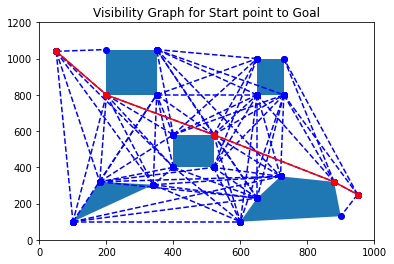

In [147]:
ax = plt.gca()
rectangle1 = plt.Rectangle((400,400), 120, 180)
ax.add_patch(rectangle1)
rectangle2 = plt.Rectangle((650,800), 80, 200)
ax.add_patch(rectangle2)
rectangle3 = plt.Rectangle((200,800), 150, 250)
ax.add_patch(rectangle3)
pts = np.array([[100,100], [180,320], [340,np.sqrt(320**2 - 100**2)]])
p = Polygon(pts, closed=False)
ax.add_patch(p)
pts1 = np.array([[600,100],[650,230],[720,350],[880,320],[900,130]])
p1 = Polygon(pts1, closed=True)
ax.add_patch(p1)
plt.plot(50,1040,'ro',markerfacecolor="red") 
plt.plot(950,250,'ro',markeredgecolor="green",markerfacecolor="green") 
ax.set_xlim([0,1000])
ax.set_ylim([0,1200])
for s, e in visibility_graph.edges:
    start_loc = nodes[s]
    end_loc = nodes[e]
    x_values = [start_loc[0], end_loc[0]]
    y_values = [start_loc[1], end_loc[1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")
i,j=0,1
while(j!=len(path_arr)):
    start_loc = nodes[path_arr[i]]
    end_loc = nodes[path_arr[j]]
    x_values = [start_loc[0],end_loc[0]]
    y_values = [start_loc[1],end_loc[1]]
    plt.plot(x_values,y_values,'ro',linestyle='-')
    i+=1
    j+=1
plt.title('Visibility Graph for Start point to Goal')
plt.show()

In [ ]:
# The red Line indicates the shortest path from the start node to the goal node in the visbility graph formed.